# Интерполяция кривой
Линейная интерполяция применяется для сокращения размера таблиц таблично заданных функций, при этом значения функции заданы в сокращённом количестве точек, а её значения в точках, отсутствующих в таблице, вычисляются по формуле линейной интерполяции.

- Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y).

In [19]:
import numpy as np

def timer(number):
    def decorator(func):
        import time

        def wrapper(*args, **kwargs):
            result = 0
            for i in range(0, number):
                start = time.time()
                func(*args, **kwargs)
                end = time.time()
                result += end - start
            print("Method: ", func.__name__, ", Time:", result / number)
            return func(*args, **kwargs)

        return wrapper

    return decorator

n = np.random.randint(5, 20)
x = np.random.uniform(0, 10, n)
y = np.random.uniform(0, 10, n)

x, y = zip(*sorted(zip(x, y)))

- Применим метод интерполяции Лагранжа к сгенерированным данным из библиотек scipy.

![Lagrange implementation](../images/lagrange.png)

- Реализуем метод Лагранда без использования сторонних библиотек.
- Визуализируем кривую интерполяции библиотечного и моего алгоритма с помощью matplotlib.

Method:  other_lagrange_interpolation , Time: 0.0025594329833984377


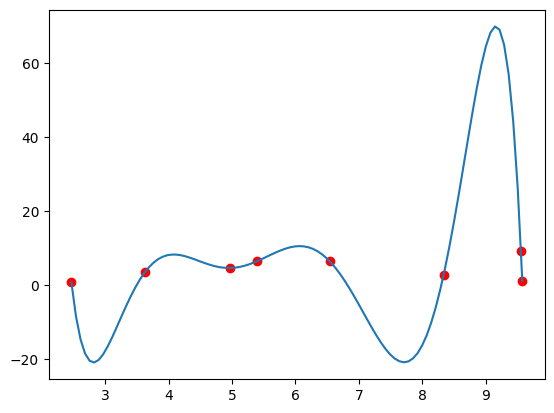

In [20]:
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt

def draw(xnew_m, ynew_m, x_m, y_m):
    plt.scatter(x_m, y_m, c='r', marker='o')
    plt.plot(xnew_m, ynew_m)
    plt.show()

@timer(100)
def other_lagrange_interpolation(x_m, y_m, xnew_m):
    return interpolate.lagrange(x_m, y_m)(xnew_m)

xnew = np.linspace(x[0], x[-1], 100)
other_ynew = other_lagrange_interpolation(x, y, xnew)
draw(xnew, other_ynew, x, y)

Method:  my_lagrange_interpolation , Time: 0.0004332375526428223


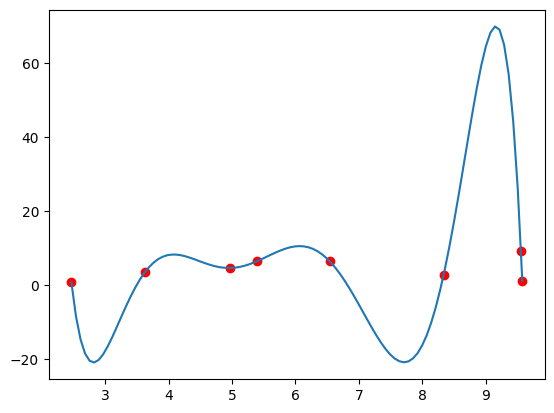

In [21]:
@timer(100)
def my_lagrange_interpolation(x_m, y_m, xnew_m):
    ynew_m = np.zeros_like(xnew_m)
    for i in range(len(x_m)):
        p = y_m[i]
        for j in range(len(x_m)):
            if i != j:
                p *= (xnew_m - x_m[j]) / (x_m[i] - x_m[j])
        ynew_m += p
    return ynew_m

my_ynew = my_lagrange_interpolation(x, y, xnew)
draw(xnew, my_ynew, x, y)

- Сравним качество интерполяции моего и библиотечного методов
Вывод: библиотечный метод работает быстрее поскольку, использует более эффективные методы.
```python
from numpy import  poly1d

def lagrange(x, w):
    M = len(x)
    p = poly1d(0.0)
    for j in range(M):
        pt = poly1d(w[j])
        for k in range(M):
            if k == j:
                continue
            fac = x[j]-x[k]
            pt *= poly1d([1.0, -x[k]])/fac
        p += pt
    return p
```